In [1]:
from random import randrange
from random import randint
import numpy as np
from decision_tree import DecisionTree


In [2]:
# Training data
train_data = np.loadtxt("data.txt", delimiter=",")
train_y = np.loadtxt("target.txt")

mock_train = np.loadtxt("mock_data.csv", delimiter=",")
mock_y = mock_train[ : , -1]

In [3]:
# fold size (% of dataset size) e.g. 3 means 30%
FOLD_SIZE = 10
# number of trees
N_TREES = 20
# max tree depth
MAX_DEPTH = 30
# min size of tree node
MIN_NODE = 1

In [4]:
trees = list()

In [5]:
dataset_split = list()
sample_size_fold = int(len(mock_train)*N_TREES/10) # number of training examples per fold

In [6]:
sample_size_fold

200

In [7]:
fold = list()

In [8]:
while len(fold) < sample_size_fold:
    index = randrange(len(mock_train)) # cchoose randomly within range
    fold.append(mock_train[index])

In [9]:
index

52

In [10]:
fold

[array([864., 939., 191., 620., 431.,   1.]),
 array([402.,  97., 283., 569., 638.,   3.]),
 array([131., 912., 803., 232., 852.,   1.]),
 array([326., 195., 651., 727.,  85.,   3.]),
 array([938., 800., 911., 345.,  49.,   3.]),
 array([399.,  51., 285., 973., 509.,   1.]),
 array([335., 219., 596., 763., 231.,   1.]),
 array([831., 290., 228., 586., 971.,   1.]),
 array([466.,  16., 897., 222., 731.,   1.]),
 array([870., 704., 430., 270., 327.,   2.]),
 array([ 95., 537., 106., 490., 518.,   2.]),
 array([146., 512.,  87., 344., 233.,   3.]),
 array([991., 968., 886.,  43., 883.,   1.]),
 array([117., 609., 290., 133., 357.,   2.]),
 array([207., 812., 788., 182., 494.,   1.]),
 array([207., 812., 788., 182., 494.,   1.]),
 array([701., 478., 227., 863., 963.,   2.]),
 array([662., 951., 947., 923., 112.,   3.]),
 array([648., 715., 288., 619., 293.,   1.]),
 array([146., 512.,  87., 344., 233.,   3.]),
 array([845., 833., 998., 211., 684.,   2.]),
 array([666., 530., 683., 234., 43

In [11]:
len(fold)

200

In [12]:
set1 = np.array(fold)
dataset_split.append(set1)

In [13]:
set1

array([[864., 939., 191., 620., 431.,   1.],
       [402.,  97., 283., 569., 638.,   3.],
       [131., 912., 803., 232., 852.,   1.],
       ...,
       [287., 266., 195.,  30., 344.,   3.],
       [567., 734., 460., 429., 689.,   1.],
       [203.,  53., 995., 704., 927.,   2.]], shape=(200, 6))

In [14]:
dataset_split # inside this there are 10 fold each fold contain 200 samples

[array([[864., 939., 191., 620., 431.,   1.],
        [402.,  97., 283., 569., 638.,   3.],
        [131., 912., 803., 232., 852.,   1.],
        ...,
        [287., 266., 195.,  30., 344.,   3.],
        [567., 734., 460., 429., 689.,   1.],
        [203.,  53., 995., 704., 927.,   2.]], shape=(200, 6))]

In [15]:
dataset_split[0][0]

array([864., 939., 191., 620., 431.,   1.])

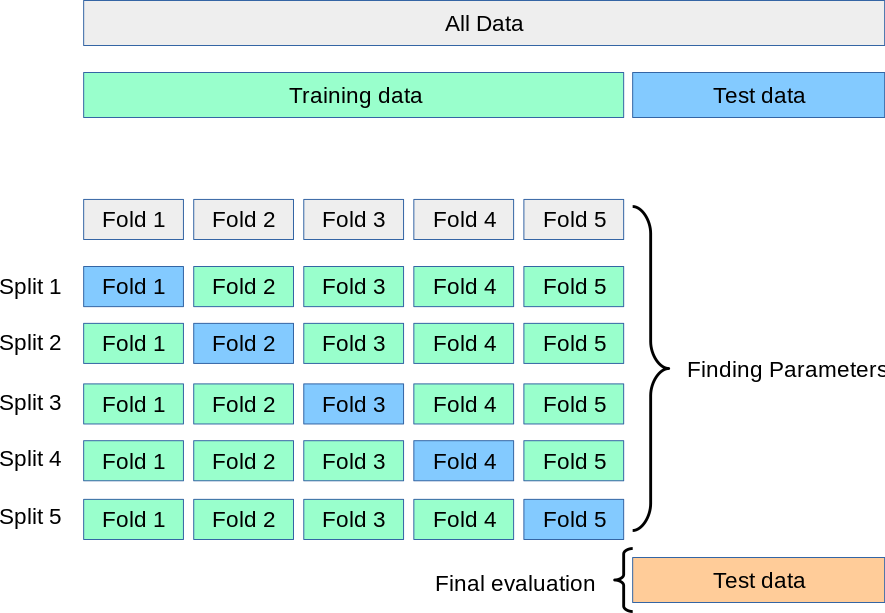

In [62]:
def cross_validation_split(dataset, n_folds, n_tree):
    """
        This function splits the given dataset into n-folds with replacement. The number of folds is equal to the number of the trees that will be trained.
        Each tree will have one fold as input. The size of the folds is a percentage (p) of the size of the original dataset. 

        Parameters:
        dataset: np array of the given dataset
        n_folds (int): number of folds in which the dataset should be split. Must be equal to the number of trees the user wants to train
        p (int): suggests the percentage of the dataset's size the size of a single fold should be.

        Returns list of np arrays: list with the k-folds 

    """
    dataset_split = list()
    sample_per_fold = int(len(dataset)*n_tree/10)
    for i in range(n_folds):
        fold = list()
        while len(fold) < sample_per_fold:
            index = randrange(len(dataset))
            fold.append(dataset[index])
        set1 = np.array(fold)
        dataset_split.append(set1)
    return dataset_split

In [17]:
l = len(dataset_split[0][0]) # no of columns in each sample of fold of dataset_split

In [18]:
l

6

In [19]:
n_features = int((l-1)*5/10) # chosen 2 features randomly

In [20]:
n_features

2

In [21]:
rng = list(range(len(dataset_split[0][0]) - 1)) # range of features columns index except target columns

In [22]:
rng

[0, 1, 2, 3, 4]

In [23]:
randint(0,len(rng)-1) # select random no within 0 to 4 columns index

0

In [24]:
selected = rng.pop(randint(0,len(rng)-1)) # pop selected column index

In [25]:
selected

3

In [26]:
rng  # rest no of columns after popping

[0, 1, 2, 4]

In [27]:
dataset_split[0]

array([[864., 939., 191., 620., 431.,   1.],
       [402.,  97., 283., 569., 638.,   3.],
       [131., 912., 803., 232., 852.,   1.],
       ...,
       [287., 266., 195.,  30., 344.,   3.],
       [567., 734., 460., 429., 689.,   1.],
       [203.,  53., 995., 704., 927.,   2.]], shape=(200, 6))

In [28]:
split = np.delete(dataset_split[0], selected, 1) # selected column index 3 deleted

In [29]:
split[:5]

array([[864., 939., 191., 431.,   1.],
       [402.,  97., 283., 638.,   3.],
       [131., 912., 803., 852.,   1.],
       [326., 195., 651.,  85.,   3.],
       [938., 800., 911.,  49.,   3.]])

In [30]:
split.shape

(200, 5)

In [31]:
dataset_split1 = list()

In [32]:
set2 = np.array(split)

In [33]:
set2

array([[ 864.,  939.,  191.,  431.,    1.],
       [ 402.,   97.,  283.,  638.,    3.],
       [ 131.,  912.,  803.,  852.,    1.],
       [ 326.,  195.,  651.,   85.,    3.],
       [ 938.,  800.,  911.,   49.,    3.],
       [ 399.,   51.,  285.,  509.,    1.],
       [ 335.,  219.,  596.,  231.,    1.],
       [ 831.,  290.,  228.,  971.,    1.],
       [ 466.,   16.,  897.,  731.,    1.],
       [ 870.,  704.,  430.,  327.,    2.],
       [  95.,  537.,  106.,  518.,    2.],
       [ 146.,  512.,   87.,  233.,    3.],
       [ 991.,  968.,  886.,  883.,    1.],
       [ 117.,  609.,  290.,  357.,    2.],
       [ 207.,  812.,  788.,  494.,    1.],
       [ 207.,  812.,  788.,  494.,    1.],
       [ 701.,  478.,  227.,  963.,    2.],
       [ 662.,  951.,  947.,  112.,    3.],
       [ 648.,  715.,  288.,  293.,    1.],
       [ 146.,  512.,   87.,  233.,    3.],
       [ 845.,  833.,  998.,  684.,    2.],
       [ 666.,  530.,  683.,  439.,    1.],
       [ 203.,   53.,  995.,  92

In [34]:
dataset_split1.append(set2)  # store same as less one   column

In [35]:
dataset_split1[0]

array([[ 864.,  939.,  191.,  431.,    1.],
       [ 402.,   97.,  283.,  638.,    3.],
       [ 131.,  912.,  803.,  852.,    1.],
       [ 326.,  195.,  651.,   85.,    3.],
       [ 938.,  800.,  911.,   49.,    3.],
       [ 399.,   51.,  285.,  509.,    1.],
       [ 335.,  219.,  596.,  231.,    1.],
       [ 831.,  290.,  228.,  971.,    1.],
       [ 466.,   16.,  897.,  731.,    1.],
       [ 870.,  704.,  430.,  327.,    2.],
       [  95.,  537.,  106.,  518.,    2.],
       [ 146.,  512.,   87.,  233.,    3.],
       [ 991.,  968.,  886.,  883.,    1.],
       [ 117.,  609.,  290.,  357.,    2.],
       [ 207.,  812.,  788.,  494.,    1.],
       [ 207.,  812.,  788.,  494.,    1.],
       [ 701.,  478.,  227.,  963.,    2.],
       [ 662.,  951.,  947.,  112.,    3.],
       [ 648.,  715.,  288.,  293.,    1.],
       [ 146.,  512.,   87.,  233.,    3.],
       [ 845.,  833.,  998.,  684.,    2.],
       [ 666.,  530.,  683.,  439.,    1.],
       [ 203.,   53.,  995.,  92

In [55]:
len(dataset_split1)

1

In [56]:
dataset_split1[0].shape

(200, 5)

note : we can reuse same data variable name  if previous data variable is no longer needed to save space that is
memory optimization

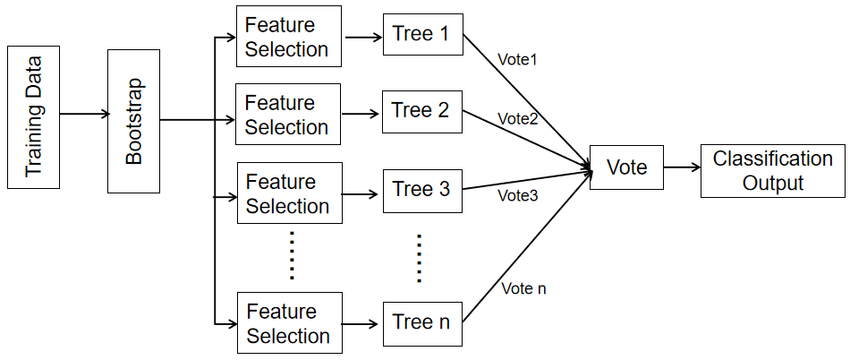

In [61]:
def randomize_features(splits):
    """
    This function randomizes the selection of the features each tree will be trained on.

    Parameters:
        splits list of np arrays: list of folds
        

    Returns list of np arrays: list with the k-folds with some features randomly removed

    """
    dataset_split = list()  # initiate same list var name which is used in dataset_split to save space as previous dataset
    # split list is no longer needed > space optimization
    l = len(splits[0][0])
    n_features = int((l-1)*5/10)
    for split in splits:
        for i in range(n_features):
            rng = list(range(len(split[0]) - 1))
            selected = rng.pop(randint(0,len(rng)-1))
            split = np.delete(split, selected, 1)
        set2 = np.array(split)
        dataset_split.append(set2)
    return dataset_split


In [37]:
for fold in dataset_split1:
    dt = DecisionTree(MAX_DEPTH, MIN_NODE)
    dt.train(fold)
    trees.append(dt)

In [38]:
dt

In [39]:
trees

In [40]:
for tree in trees:
    print(tree)

In [63]:
def train(X):
    """
    Iteratively train each decision tree.
    Parameters:
    X (np.array): Training data

    """
    train_x =cross_validation_split(X,n_tree=N_TREES,n_folds=FOLD_SIZE)
    train_x =randomize_features(train_x)
    for fold in train_x:
        dt = DecisionTree(MAX_DEPTH, MIN_NODE)
        dt.train(fold)
    trees.append(dt)

In [42]:
predicts = list()

In [43]:
final_predicts = list()

In [44]:
for tree in trees:
    # tree.predict(mock_train)
    predicts.append(tree.predict(mock_train)) # prediction for all trees or fold

In [45]:
tree

In [46]:
predicts # prediction for all tree and all fold sample there has 10 fold ( here only one is shown)

[array([2., 2., 1., 2., 1., 3., 1., 2., 3., 3., 2., 2., 2., 1., 2., 3., 1.,
        1., 1., 1., 3., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 3., 3.,
        1., 1., 1., 3., 2., 1., 1., 1., 2., 2., 3., 3., 2., 2., 3., 2., 2.,
        1., 2., 3., 1., 3., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2.,
        1., 2., 1., 1., 2., 3., 2., 1., 3., 1., 1., 1., 1., 1., 1., 2., 1.,
        2., 2., 3., 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1.])]

In [47]:
predicts[0] # prediction for one fold contain 100 samples

array([2., 2., 1., 2., 1., 3., 1., 2., 3., 3., 2., 2., 2., 1., 2., 3., 1.,
       1., 1., 1., 3., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 3., 3.,
       1., 1., 1., 3., 2., 1., 1., 1., 2., 2., 3., 3., 2., 2., 3., 2., 2.,
       1., 2., 3., 1., 3., 1., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2.,
       1., 2., 1., 1., 2., 3., 2., 1., 3., 1., 1., 1., 1., 1., 1., 2., 1.,
       2., 2., 3., 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 1.])

In [57]:
predicts[0].shape

(100,)

In [48]:
values = list()

In [49]:
values.append(predicts[0][0]) # collect all predictions for same sample data for 10 trees or folds

In [50]:
values

[np.float64(2.0)]

In [51]:
max(set(values), key=values.count) # for maximum predictions or votes for same sample

np.float64(2.0)

In [ ]:
# set(values): Converts the collection of values into a set, which removes duplicates.
# max(...): Finds the maximum value in the set, based on a custom key function.
# key=values.count: Specifies a key function that returns the count of each value in the original collection.
# How it works:
# The max function iterates over the unique values in the set.
# For each value, it calls the count method on the original collection, which returns the number of occurrences of that value.
# The max function then returns the value with the highest count.
# Example:
# Python
# values = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
# most_frequent = max(set(values), key=values.count)
# print(most_frequent)  # Output: 4

In [52]:
final_predicts.append(max(set(values), key=values.count)) # results of vote for all samples

In [53]:
final_predicts

[np.float64(2.0)]

In [64]:
def predict(X):
    """
    This function outputs the class value for each instance of the given dataset as predicted by the random forest algorithm.
    Parameters:
    X (np.array): Dataset with labels

    Returns y (np.array): array with the predicted class values of the dataset
    """
    predicts = list()
    final_predicts = list()
    for tree in trees:
        predicts.append(tree.predict(X))
    # iterate through each tree's class prediction and find the most frequent for each instance
    for i in range(len(predicts[0])):
        values = list()
        for j in range(len(predicts)):
            values.append(predicts[j][i])
        final_predicts.append(max(set(values), key=values.count))
    return final_predicts,predicts


In [65]:
train(mock_train)

In [66]:
y_pred,y_pred_ind = predict(mock_train)
print(f"Accuracy of random forest: {sum(y_pred == mock_y) / mock_y.shape[0]}")
print("\nAccuracy for each individual tree:")

Accuracy of random forest: 0.53

Accuracy for each individual tree:


In [67]:
c = 1
for i in y_pred_ind:
    print("\nTree",c)
    print(f"Accuracy: {sum(i == mock_y) / mock_y.shape[0]}")
    c = c+1


Tree 1
Accuracy: 0.54

Tree 2
Accuracy: 0.36
